In [26]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [27]:
from sklearn.model_selection import train_test_split
X=iris.data[iris.target!=2,0:2]  # It is important to delete the last target 2 and only use '0' and '1'
y=iris.target[iris.target!=2]    # If i do not delete it it tries to find the supvectors across de 3 targets and fails
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
     

(80, 2)
(20, 2)


In [28]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

1.0

Exploring more now, in class:

- Choose only first two features (columns) of iris.data

- SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data

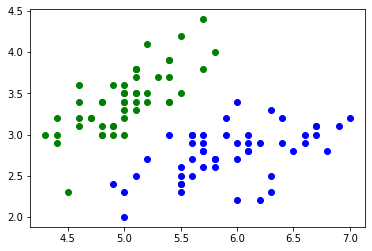

In [29]:
import matplotlib.pyplot as plt
plt.scatter(X[y==0,0],X[y==0,1],color='green')
plt.scatter(X[y==1,0],X[y==1,1],color='blue')
#plt.scatter(X[y==2,0],X[y==2,1],color='cyan')

(16, 2)
(80, 2)
(80,)
[[5.5 3.5]
 [5.4 3.4]
 [5.7 3.8]
 [5.  3. ]
 [5.4 3.4]
 [4.8 3. ]
 [4.5 2.3]
 [4.9 3. ]
 [5.4 3. ]
 [5.6 3. ]
 [5.2 2.7]
 [5.1 2.5]
 [6.  3.4]
 [4.9 2.4]
 [5.9 3.2]
 [5.6 3. ]]
[2.22720463]
[-2.24959916]
[-4.94178501]


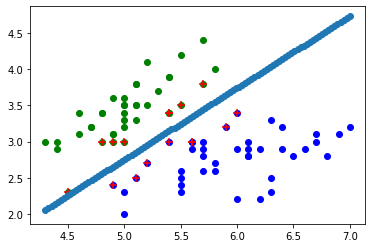

In [30]:
supvectors=SVMmodel.support_vectors_
print(supvectors.shape)
print(X_train.shape)
print(y_train.shape)

print(supvectors)
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1],color='green')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],color='blue')
plt.scatter(X_train[y_train==2,0],X_train[y_train==2,1],color='cyan')

plt.scatter(supvectors[:,0],supvectors[:,1],color='red',marker='+',s=50)


W=SVMmodel.coef_
b=SVMmodel.intercept_
import numpy as np
xgr=np.linspace(min(X[:,0]),max(X[:,0]),100)

print(W[:,0])
print(W[:,1])
print(b)

ygr=-W[:,0]/W[:,1]*xgr-b/W[:,1]
plt.scatter(xgr,ygr)